In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

sns.set_theme(style="darkgrid")

In [2]:
dir = r"/home/bruno/Documentos/mba_usp/arvores_redes_ensemble_models_2/Arquivos e scripts 27.06.23 - Atualizado/tips.csv"
df = pd.read_csv(dir).drop(columns="Unnamed: 0")

df_copy = df.copy()

df_copy.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df_copy["pct_tip"] = df_copy.tip / (df_copy.total_bill - df_copy.tip)
df_copy.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


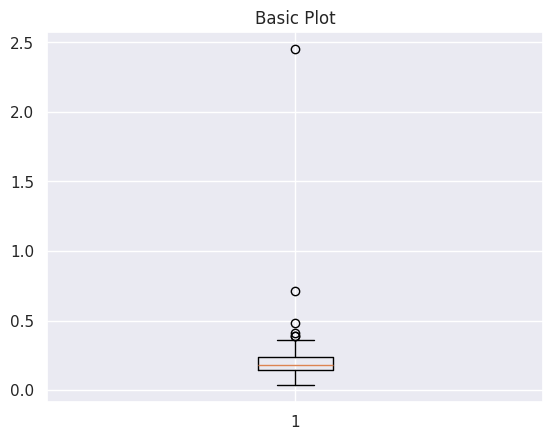

In [4]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df_copy.pct_tip);

Remoção de outliers

Utilizando apenas valores de pct_tip menores que 1

In [5]:
df_copy = df_copy[df_copy["pct_tip"] < 1]

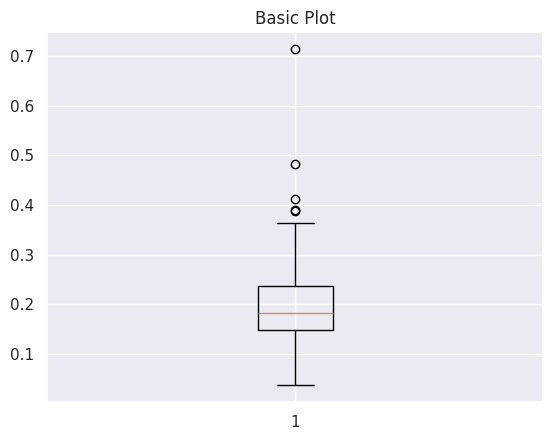

In [6]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df_copy.pct_tip);

In [7]:
def count_plot(df, eixo_x):
    return sns.countplot(df, x=eixo_x)

def bar_plot(df, eixo_x, eixo_y):
    # Criar um gráfico de barras com intervalo de confiança
    ax = sns.barplot(data=df, x=eixo_x, y=eixo_y,  errorbar="sd")
        
    return sns.pointplot(data=df, x=eixo_x, y=eixo_y, color="black", errorbar=None, estimator=lambda x: x.mean(), ax=ax)

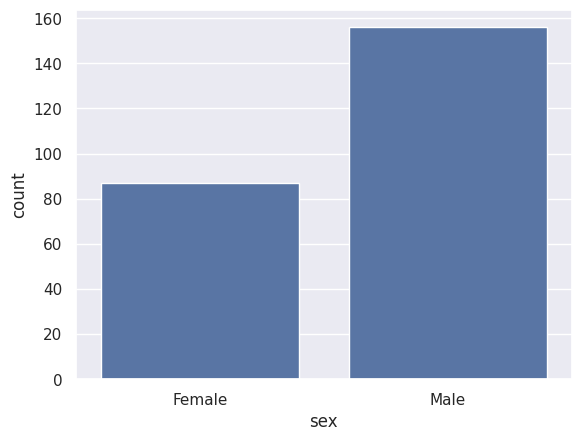

In [8]:
count_plot(df_copy, "sex");

De acordo com o plot acima, a população masculina é maior que a feminina

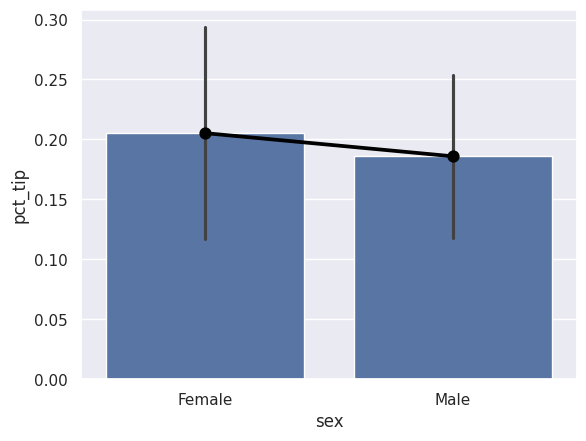

In [9]:
bar_plot(df_copy, "sex", "pct_tip");

No gŕafico acima a porcentagem de gorjeta entre a população feminina é um pouco maior que a masculina.

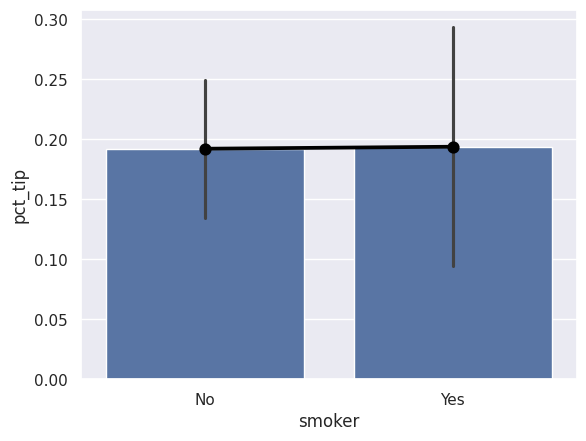

In [10]:
bar_plot(df_copy, "smoker", "pct_tip");

No gŕafico acima a porcentagem de gorjeta entre a fumantes e não fumantes é relativamente igual.

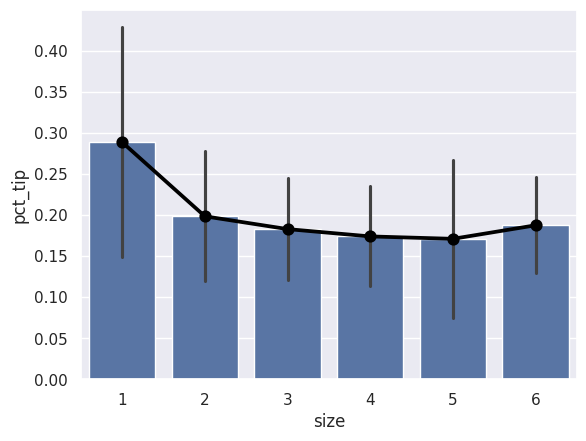

In [11]:
bar_plot(df_copy, "size", "pct_tip");

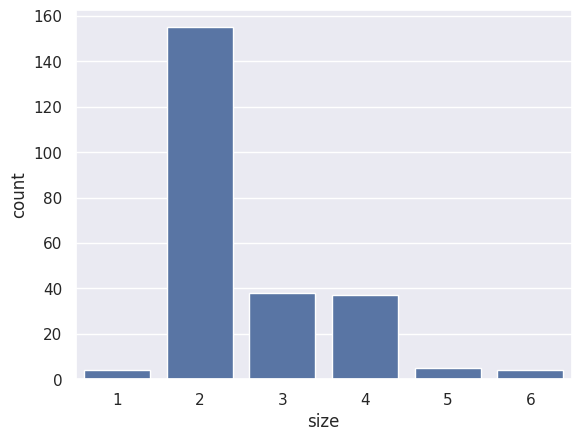

In [12]:
count_plot(df_copy, "size");

No gráfico 5 podemos verificar que a mesa que possui lugar para 1 pessoa (size = 1) tem a maior porcentagem de dar gorjeta, porém, realizando o plot com base na frequencia das mesas (grafico 6), a quantidade de mesas com lugar para 1 pessoa é extremamente baixo.

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Método LabelEncoding: Converter variaveis categoricas para numéricas

In [31]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df, col):
    # Creating a instance of label Encoder.
    le = LabelEncoder()

    # Using .fit_transform function to fit label
    # encoder and return encoded label
    label = le.fit_transform(df[col])

    return label

In [32]:
label_sex = label_encoding(df_copy, "sex")
label_smoker = label_encoding(df_copy, "smoker")
label_day = label_encoding(df_copy, "day")
label_time = label_encoding(df_copy, "time")

In [33]:
df_copy["label_sex"] = label_sex
df_copy["label_smoker"] = label_smoker
df_copy["label_day"] = label_day
df_copy["label_time"] = label_time

In [34]:
df_copy.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip,label_sex,label_smoker,label_day,label_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,0,0,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,1,0,2,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,1,0,2,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,1,0,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,0,0,2,0


Treinamento da árvore (não incluso o valor da gorjeta como explicativa)

In [42]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(123)

# Defina as variáveis independentes e dependentes
X = df_copy.drop(['sex', 'smoker', 'day', 'time', 'pct_tip', 'total_bill', 'tip'], axis = 1) # Features
y = df_copy['pct_tip']  # Target

# Ajuste a árvore de regressão
arvore_reg = DecisionTreeRegressor(criterion='squared_error', min_samples_split=2, max_depth=2)
arvore_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

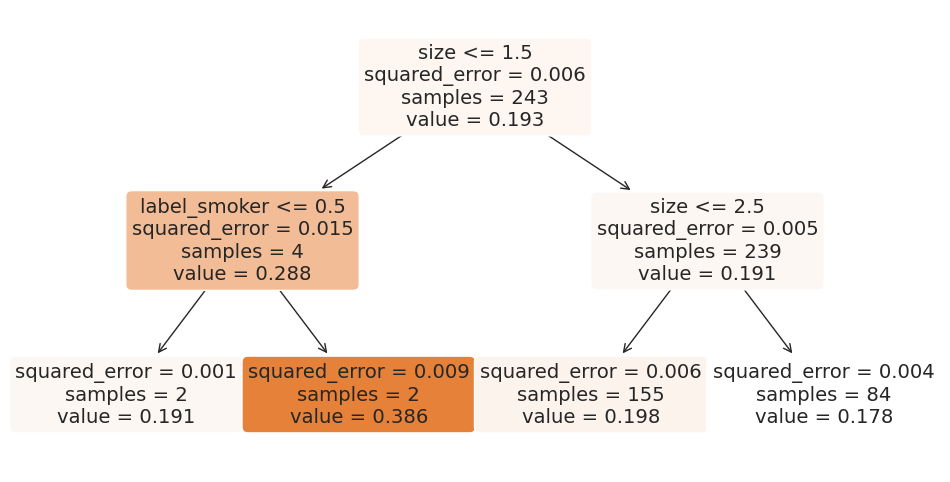

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(arvore_reg, feature_names=X.columns, filled=True, rounded=True)
plt.show()